In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import UpSampling2D, Flatten, Reshape
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, M), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float') / 255

In [3]:
autoencoder = Sequential()
#encoding
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, activation='relu', padding='same'))

#decoding
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='relu'))
autoencoder.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

In [4]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data = (X_test, X_test))

Epoch 1/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2386 - val_loss: 0.2285
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1913 - val_loss: 0.1759
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1917 - val_loss: 0.1717
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1842 - val_loss: 0.1731
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1911 - val_loss: 0.1685
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1703 - val_loss: 0.2046
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1763 - val_loss: 0.1550
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1623 - val_loss: 0.1546
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1518 - val_loss: 0.1426
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1522 - val_loss: 0.1562

In [5]:
# 간은 없던걸 만들어내는거
# 오토인코더는 압축했다가 풀어서 비슷하게 유지시키는거

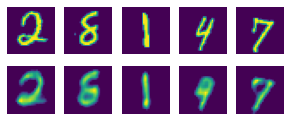

In [6]:
random_test = np.random.randint(X_test.shape[0], size=5)
ae_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(7,2))
for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i + 1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7 + i + 1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')
    
plt.show()